In [6]:
import numpy as np
import matplotlib.pyplot as plt
import torch

## Finding a minimum through derivative descent

Before we look at gradient descent, we will consider a simpler example of single value functions and regular derivative.

Suppose we have $f(x)=x^2-x$. We want to find the minuimum of this function. From Calculus 1, we know that the derivative of $f(x)$ is $f'(x)=2x-1$. In Calculus 1 we would then solve $f'(x)=0$ to find critical points and among those we would find a minimum. However, in general it is hard to solve random equations and so we will estimate minimum by moving in the direction of negative derivative. 

Why would that work?

a. Since to the right of minimum function is increasing, then the derivative is positive; and so to get to minimum we need to move to the negative direction.

b. Since on the left of minimum function is decreasing, then the derivative is negative; and so we have to move to positive direction to get to minimum.

The only thing we dont know is how far we should move in those directions. This is controlled by a parameter that we will call "learning rate". Choosing a good learning rate is important. If it is too small, we might never get close enough to the minimum. If it is too big, we might keep overshooting the minimum.

So what we are going to do is 

1. Start at some random value $x_0$.
2. Calculate derivative $f'(x_0)$.
3. Move in the directing of a negative of the derivative scaled by Learning rate: $x_1=x_0 - lr \cdot f'(x_0)$
4. Repeat the process using new found value several times.

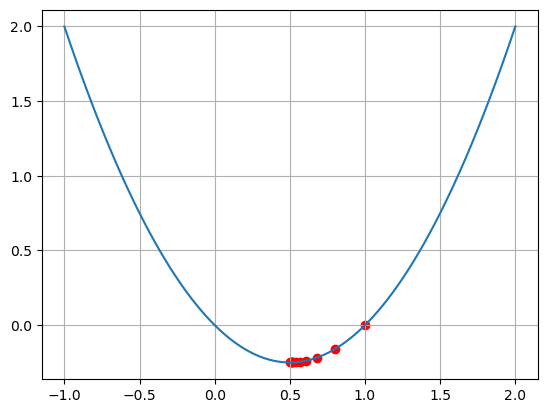

Estimated Value: 0.5030


In [19]:
def f(x):
    return x**2-x
def df(x):
    return 2*x-1

lr=0.2            #   learning rate
x=np.array([1])   #   random starting number

for i in range(10):
    x=np.append(x,x[i]-lr*df(x[i]))



fig=plt.figure()
plt.scatter(x, f(x), c='r')
xv=np.linspace(-1,2, 100)
plt.plot(xv, f(xv))
plt.grid()
plt.show()
print(f'Estimated Value: {x[-1]:.4f}')

# Gradient
Four examples of gradient:

## Example 1

Let $F(x,a)=2(a+x)^2$. We can consider $F$ as a composition of three simple functions: $F(x,a)=f\circ g\circ h(x,a)$, where

$f(g)=2g$, 

$g(h)=h^2$ and 

$h(x,a)=a+x$.

We want to know $\frac{\partial F}{\partial a}$ when $x=2$ and $a=3$. By chain rule, $\frac{\partial F}{\partial a}=\frac{\partial f}{\partial g}\frac{\partial g}{\partial h}\frac{\partial h}{\partial a}=(2)*(2h)*(1)=4h=4(a+x)$. And now we evaluate: $4(3+2)=20$

The backpropagation is a techique to find this gradient going back through our partial derivative.
    

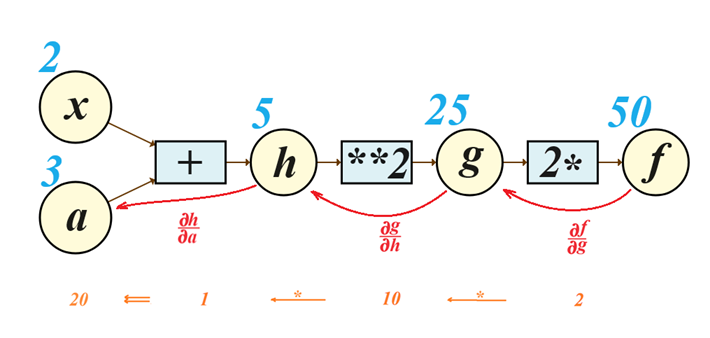

## Example 2
Suppose we have $F(x,a)=3(x+a)-(x+a)^2$. We want to find $\frac{\partial F}{\partial x}$. Using similar approach to above we can split $F$ into basic operations, like so:

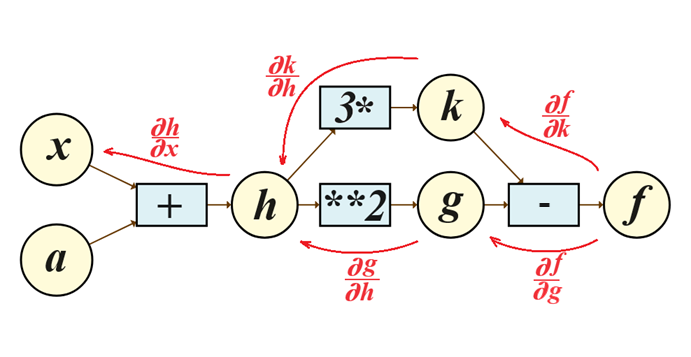

As you can see we have two paths from $f$ to $x$. Let's get all partial derivatives:

$\frac{\partial f}{\partial g}=-1$

$\frac{\partial f}{\partial k}=1$

$\frac{\partial g}{\partial h}=2h$

$\frac{\partial k}{\partial h}=3$

$\frac{\partial h}{\partial x}=1$

To compute $\frac{\partial f}{\partial h}$ we add both paths, so 

$\frac{\partial f}{\partial h}=\frac{\partial f}{\partial g}\frac{\partial g}{\partial h}+\frac{\partial f}{\partial k}\frac{\partial k}{\partial h}=(-1)(2h)+(1)(3)=-2h+3$   (Make sure this makes sense. Consider that $f(h)=3h-h^2$)

Finally, $\frac{\partial f}{\partial x}=\frac{\partial f}{\partial h}\frac{\partial h}{\partial x}=(-2h+3)(1)=(-2h+3)=-2(x+a)+3$


#### To summarize, to find derivative $\frac{\partial f}{\partial x}$, you consider all paths from $f$ to $x$. You multiply partial derivatives along each path, and then add the results.

## Example 3
Let $F(x,a)=(5x+a)^2$. This time we want gradient of $F$, which is a vector consisting of all partial derivatives. There are two variables, so we will have a vector
   $$\nabla F=\left[ \frac{\partial F}{\partial x},\frac{\partial F}{\partial a} \right].$$
   Each partial derivative is computed just as in example 1. If $x=2$ and $a=3$, we can find this gradient through backpropagation too:

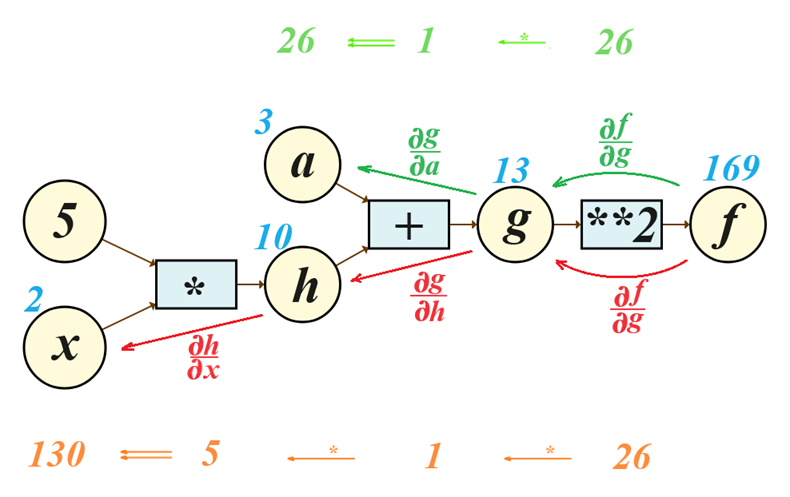

So,  $\nabla F=\left[130, 26\right]$


## Example 4
Finally let's look at example where both our input and output is a vector. In other words we have multiple values as input and multiple values as output.

Let $F(x,y)= [ 3(x-y), (x^2-2y)^2 ]$. We will think of this as $F(x,y)= [ f_1(x,y), f_2(x,y)]$. Each of the inner functions $f_1$ and $f_2$ are similar to our example 3. So, we find the gradient of each of them and arrange them in the matrix form:

$$\begin{bmatrix} \frac{\partial f_1}{\partial x} & \frac{\partial f_1}{\partial y} \\
                 \frac{\partial f_2}{\partial x} & \frac{\partial f_2}{\partial y}
                 \end{bmatrix}$$

This matrix is called Jacobian matrix. Notice that columns of it are gradients of $f_1$ and $f_2$.

In this case if $x=3$ and $y=2$, we have that

$$\nabla f_1 =\left[-1, -3 \right],\nabla f_2=\left[60,-20\right]$$

And Jacobian is

$$J=\begin{bmatrix} -1 & -3 \\ 60 & -20\end{bmatrix}$$

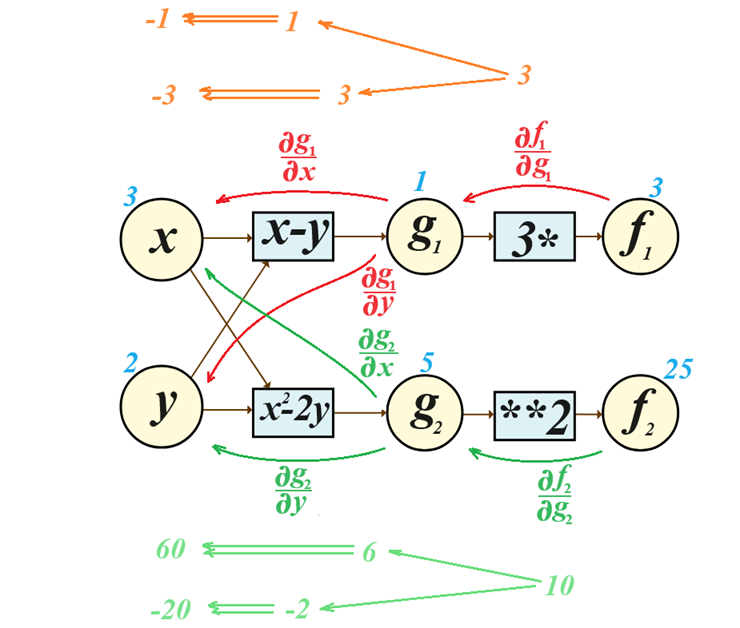

### Looking at Example 1 through PyTorch:

Let $F(x,a)=2(a+x)^2$. We can consider $F$ as a composition of three simple functions: $F(x,a)=f\circ g\circ h(x,a)$, where $f(g)=2g$, $g(h)=h^2$ and $h(x,a)=a+x$. We want to know $\frac{\partial F}{\partial a}$ when $x=2$ and $a=3$.

In [22]:
x=torch.tensor(2.0)
a=torch.tensor(3.0, requires_grad=True)  # requires_grad=True means we will want to find gradient with respect this variable

h=a+x
print(h)

tensor(5., grad_fn=<AddBackward0>)


Notice that $h$ is 5 and it also has grad function "AddBackward". This function holds gradient of that addition for when we need to go back.

In [23]:
g=h**2
print(g)
f=2*g
print(f)

tensor(25., grad_fn=<PowBackward0>)
tensor(50., grad_fn=<MulBackward0>)


In [24]:
f.backward()     #computes  df/da
print(a.grad)

tensor(20.)


Of course we can do this all at once. 
Note Torch remembers all gradients. So if we want to reuse our variables we need to reset the gradients:

In [30]:
a.grad.zero_()

tensor(0.)

In [31]:
f= 2*(a+x)**2
f.backward()     
print(a.grad)

tensor(20.)
